#### Nome: Ramon Oliveira de Azevedo
#### DRE: 120023419
#### 7° Período
#### Ciência da Computação

# Projeto de Introdução ao Aprendizado de Máquina - Professor João Carlos Pereira da Silva

# <center>Análise de Dados com Redes Neurais - Multilayer Perceptron</center>

---



##Sumário

*   Apresentação do projeto e objetivo
*   A Base de Dados
*   Implementação
*   Agradecimentos
*   Referências Bibliográficas

###Apresentação do projeto e objetivo

Este trabalho tem como objetivo a realização de estudos envolvendo a Rede Neural Multilayer Perceptron em Python, se caracterizando como a terceira tarefa dada pela disciplina "Introdução ao Aprendizado de Máquina", sendo a mesma ministrada pelo professor João Carlos Pereira da Silva. Dando continuidade, esse Colab tem a intenção de realizar a análise da database disponibilizada pelo referido docente. Ou seja, o conjunto de dados "iris.csv".

Os observadores mais atentos poderão notar que a última database escolhida é uma das mais famosas, devido a sua qualidade e vasto uso em exercício, artigos e demonstrações em fóruns na internet. Não obstante, buscarei explicar passo-a-passo a linha de raciocínio utilizada, mesmo que o código não esteja em perfeitas condições.

###A Base de Dados

####Iris.csv

Como mencionado anteriormente, o conjunto de dados "Iris" é considerado como um clássico, por ser amplamente utilizado na área de aprendizado de máquina e reconhecido como um dos bancos de dados mais conhecidos para fins de treinamento e experimentação.

Por sua vez, seus dados consistem em informações de medições de comprimento e largura de sépalas e pétalas de três espécies diferentes de flores de íris: setosa, versicolor e virginica.

Analisando de maneira mais ampla, podemos chegar a algumas razões que levam esse referido conjunto de dados ser tão famoso. Por exemplo:



*   Simplicidade: Por se tratar de um conjunto relativamente pequeno (com 150 amostras e apenas 5 atributos), o que o torna fácil de compreender e manipular.
*   Disponibilidade: Como bem sabemos, o "Iris" está amplamente disponível em bibliotecas de aprendizado de máquina, como o scikit-learn, e também pode ser facilmente importado de fontes online, como através da Kaggle. Isso facilita o acesso e uso do conjunto de dados em diferentes projetos e ambientes de aprendizado de máquina.
*   Referência: Por ser considerado um clássico da área, esse conjunto de dados conta com uma vasta coleção de referências bibliográficas, como fóruns, artigos e postagens, fazendo-se uso dos mais variados tipos de classificação e comparação de algoritmos e técnicas de aprendizado de máquina.

###Implementação

##### Começando do básico, vamos importar as bibliotecas


In [ ]:
import pandas as pd
import numpy as np
import random
import sys
import scipy
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

##### Como esse trabalho servirá como portfólio pessoal, vale deixar explícito as versões que aqui serão trabalhadas:

In [ ]:
print('Python: {}'.format(sys.version))
print('Scipy: {}'.format(scipy.__version__))
print('Pandas: {}'.format(pd.__version__))
print('NumPy: {}'.format(np.__version__))

Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
Scipy: 1.10.1
Pandas: 1.5.3
NumPy: 1.22.4


####Carregando dataset e separando as instâncias

Para dar início aos trabalhos, realizarei a importação da database Iris pegando-a de um arquivo CSV (valores separados por vírgulas, em inglês) e armazenando em uma variável do tipo dataframe:

In [ ]:
df = pd.read_csv('iris.csv', on_bad_lines='skip')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


Agora, manipularei a Iris para separar 10% do seu número total de instâncias, sendo 5 instâncias de cada classe (setosa, versicolor e virginica) que, por sua vez, serão utilizadas mais pra frente.

In [ ]:
df_amostra = df.groupby('class').apply(lambda x: x.sample(n=5))

print(df_amostra)

                     sepalLengthInCM  sepalWidthInCM  petalLengthInCM  \
class                                                                   
Iris-setosa     19               5.1             3.8              1.5   
                46               5.1             3.8              1.6   
                13               4.3             3.0              1.1   
                36               5.5             3.5              1.3   
                29               4.7             3.2              1.6   
Iris-versicolor 72               6.3             2.5              4.9   
                52               6.9             3.1              4.9   
                76               6.8             2.8              4.8   
                95               5.7             3.0              4.2   
                65               6.7             3.1              4.4   
Iris-virginica  147              6.5             3.0              5.2   
                145              6.7             3.

Com o passo anterior estando concluído, pegarei o dataset original e vou aplicar o método drop() para excluir as linhas que estão localizadas em nossa amostra do dataset original, armazenando a diferença, ou seja, os 90% restantes, na variável "df_resto". Para não exibir todo o dataset, o que consumiria um pouco mais de tempo e poluiria esse colab, como forma de verificar o seu tamanho, basta aplicar o metódo "shape()" e verificar o tamanho em linhas, que pode ser definido como:

$$tamResto = tamOriginal * 0.9$$
$$tamResto = 150 * 0.9$$
$$tamResto = 135$$

Logo, basta vermos que nosso dataframe possuirá um total de $135$ linhas, o que pode ser comprovado através do código abaixo:

In [ ]:
# Remover a amostra do dataset original
df_resto = df.drop(df_amostra.index.get_level_values(1))

print(df_resto.shape[0])

135


Dando continuidade, temos que chegou a hora de, assim como nas tarefas anteriores, definirmos o que vai ser o nosso $X$ e o que será o nosso $Y$. Bem, como visto anteriormente, temos que o nosso conjunto de dados possui os seguintes atributos:

*   sepalLengthInCM
*   sepalWidthInCM
*   petalLengthInCM
*   petalWidthInCM
*   class

Através da análise dos parâmetros dos 4 primeiros atributos acima descritos, resultará numa classe específica. Portanto, basta refletirmos brevemente sobre as caractrísticas de cada uma de nossas variáveis, ou seja:

*   A variável $X$ (também chamada de matriz de recursos ou matriz de entrada) contém os atributos ou características do conjunto de dados que serão usados para fazer as previsões. Cada linha da matriz $X$ corresponde a uma instância (amostra) e cada coluna corresponde a um atributo. Os valores em X são usados como entrada para o modelo de aprendizado de máquina.

*   A variável $Y$ (também conhecida como vetor de destino ou vetor de saída) contém as classes ou valores alvo correspondentes a cada instância do conjunto de dados. Por exemplos, para problemas de regressão (como foi o caso das tarefas anteriores), $Y$ contém os valores numéricos que queremos prever. Porém, para problemas de classificação, $Y$ contém as classes ou rótulos de cada instância.

Logo, podemos concluir que a classe $X$ vai possuir as seguintes instâncias: sepalLengthInCM, sepalWidthInCM, petalLengthInCM e, por último, petalWidthInCM

E, por fim, a classe $Y$ possuirá apenas a instância "class". Que possui os seguintes tipos possíveis:

*   Iris-setosa
*   Iris-versicolor
*   Iris-virginica

Com base nisso, o código abaixo representa essa lógica, pois para $X$ pegamos todas as colunas menos a última (class) e, para $Y$, pegamos apenas a última instância.




In [ ]:
X = df_resto.iloc[:, :-1]
y = df_resto.iloc[:, -1]

####Separando em K-Folds

Partindo para a implementação de fato, iremos fazer uso da técnica de reamostragem de Validação Cruzada utilizando K-folds, no qual dividiremos os $90\%$ do nosso conjunto de dados original em 5 subconjuntos (como pedido no enunciado da tarefa no qual esse Colab se baseia) e ela recebe esse nome devido ao seguinte fato:

*   $K$ — Significa o número de subdivisões (iguais) que nós fizemos: No nosso caso $K$ = $5$;
*   Fold — Significa cada um dos blocos de cada K.

Resumidamente, essa abordagem nos proporciona dados diferentes para treino e teste, ou seja, para cada fold vamos ter resultados distintos de acordo com cada iteração K de nosso modelo. De modo a deixar mais claro, faremos basicamente o processo descrito na imagem abaixo:

![](https://drive.google.com/uc?export=view&id=1YxfLxxvRIbwT7sy9TNc22L5EySn9YCZy)


O uso de validação cruzada usando K-Fold possui diversas vantagens, tais como:



*   Utilização mais eficiente dos dados: A validação cruzada permite que todos os dados disponíveis sejam usados tanto para treinamento quanto para teste. Isso é especialmente útil em conjuntos de dados pequenos, onde cada exemplo é valioso.
*   Avaliação mais robusta: Ao dividir o conjunto de dados em várias partes e realizar repetidas vezes a avaliação do modelo, a validação cruzada fornece uma estimativa mais confiável do desempenho médio do modelo em diferentes dados de teste.
*   Redução do viés de seleção de conjunto de teste: Ao realizar múltiplas divisões dos dados, a validação cruzada reduziu a dependência de um único conjunto de teste específico, observou o risco de escolha acidental de um conjunto de teste que não seja representativo.

Refletindo de maneira breve, podemos pensar em coisas como "Maravilha. Então essa abordagem é perfeita?", correto? Não é bem assim, apesar de ter boas vantagens, a validação cruzada usando K-fold possui alguns pontos negativos, tais como:

*   Maior tempo de processamento: A validação cruzada envolve treinar e testar o modelo várias vezes, o que pode exigir um tempo de processamento maior em comparação com uma única divisão de treinamento/teste.
*   Complexidade de implementação: A implementação correta da validação cruzada pode ser um pouco mais complexa do que simplesmente dividir o conjunto de dados em treinamento e teste. É necessário cuidado para garantir que as amostras sejam feitas corretamente e que os resultados sejam interpretados de maneira correta, tanto que, é isso que será feito mais para frente nesse Colab.
*   Variância do desempenho: Dependendo da variabilidade dos dados, diferentes divisões podem levar a resultados de desempenho variável. Em conjuntos de dados pequenos, isso pode ser um desafio, pois o desempenho do modelo pode ser sensível às divisões específicas. O que poderemos observar mais a frente, através da acurácia dos conjuntos de treinamento e teste de cada fold. Mas só daqui a pouco:

####Função Principal

Abaixo, encontra-se a função principal desse Colab, na qual será responsável por realizar todas as nossas futuras experiências. Basicamente, ela recebe por parâmetro os dados que foram previamente informados no enunciado (nos quais, sofrerão variações no decorrer desse Colab) e, com isso em mente, aplicar a lógica dos K-folds, iterando por eles e produzindo os resultados nos quais vamos analisar mais para frente.

In [ ]:
def multilayerPerceptronClassifier(hidden_layer_sizes, activation, solver, max_iter):
  n_folds = 5
  kf = KFold(n_splits=n_folds)

  for fold, (train_index, test_index) in enumerate(kf.split(df_resto)):
      X_train , X_test = X.iloc[train_index,:], X.iloc[test_index,:]
      y_train , y_test = y.iloc[train_index], y.iloc[test_index]

      warnings.filterwarnings("ignore", category=ConvergenceWarning)

      classificador = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation = activation, solver = solver, max_iter = max_iter)
      classificador.fit(X_train, y_train)

      print("Fold ", fold + 1)
      print("Score no conjunto treinamento: ", classificador.score(X_train, y_train))
      print("Score no conjunto teste: ", classificador.score(X_test, y_test))

      print("\n")

      loss_history = classificador.loss_curve_
      plt.plot(loss_history, label = f'Fold {fold + 1}')

  return plt

Sem mais delongas, vamos rodar a nossa função principal com os dados pedidos no enunciado, ou seja:

*   1 camada escondida com 2 neurônios
*   Número máximo de iterações igual a 500
*   Identity
*   Solver: adam

Representando de maneira gráfica, teremos ao todo 4 dados de entrada e 3 opções de saída. Logo, teremos algo próximo da imagem abaixo:

![](https://drive.google.com/uc?export=view&id=1mp8b2CoSc5T1XaUpoAfZn_rXsJwJedLa)

E, ao final, será mostrado o gráfico da função de perda de cada um de nossos K-folds. Então vamos lá:

Fold  1
Score no conjunto treinamento:  0.6666666666666666
Score no conjunto teste:  1.0


Fold  2
Score no conjunto treinamento:  0.6944444444444444
Score no conjunto teste:  0.7037037037037037


Fold  3
Score no conjunto treinamento:  0.8333333333333334
Score no conjunto teste:  0.0


Fold  4
Score no conjunto treinamento:  0.9259259259259259
Score no conjunto teste:  1.0


Fold  5
Score no conjunto treinamento:  0.8148148148148148
Score no conjunto teste:  0.0




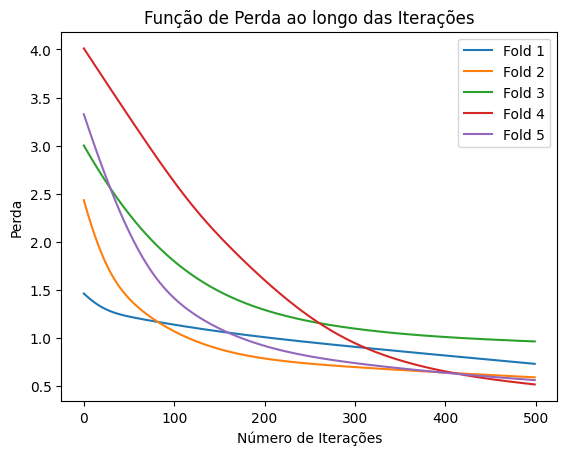

In [ ]:
plt = multilayerPerceptronClassifier(2, 'identity', 'adam', 500)

plt.title('Função de Perda ao longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.legend()
plt.show()

####6- Análise do que ocorreu.

Como podemos perceber através do gráfico acima, podemos notar que, independentemente do classificador, a função de perda demonstra uma trajetória descendente. Em outras palavras, isso indica que o modelo está aprendendo e ajustando seus pesos de forma a reduzir a discrepância entre as previsões eradas por ele e as classificações verdadeiras. Em termos gerais na área de análise de dados, o gráfico basicamente mostra que a distância entre $y$ e $y_{pred}$ está diminuindo. Por sua vez, tal contexto faz parte de um "contexto ideal", mas porque eu digo isso? Bem, não só a função de perda apresenta uma trajetória descendente, mas se repararmos, ela tende a demonstrar uma convergência para um estado de maior estabilidade, isto é, isso indica que o modelo converteu para um estado onde as melhorias adicionais são mínimas. Porém, isso será visto com maior clareza daqui a pouco, quando começar as alterações de parâmetros, entre elas, o número máximo de iterações.

####7- Ainda usando os 90% dos dados e K-fold=5, repita o experimento alterados os parâmetros anteriores. A escolha de qual(is) parâmetro(s) será(ão) alterados deve ser justificado. O que você espera alterando o(s) parâmetro(s)? O resultado obtido foi o esperado?

#####Mudando a quantidade de iterações

Para dar o pontapé inicial no nosso processo de mudanças de parâmetros com relação ao que foi pedido inicialmente, aumentarei a quantidade máxima de iterações para 4000 e, em seguida, será feita uma análise com base no gráfico da função de perda. De antemão, como estamos falando da mesma, é de imaginar que os 5 classificadores vão convergir em torno de uma reta, ficando consideravelmente próximos. Pegando o "gancho" deixado anteriormente, temos que que poderemos notar com maior clareza os gráficos entrarão numa espécie de "estabilidade", o que um cenário bastante positivo e ideal.

Fold  1
Score no conjunto treinamento:  0.9814814814814815
Score no conjunto teste:  1.0


Fold  2
Score no conjunto treinamento:  0.9722222222222222
Score no conjunto teste:  1.0


Fold  3
Score no conjunto treinamento:  1.0
Score no conjunto teste:  0.8148148148148148


Fold  4
Score no conjunto treinamento:  0.9907407407407407
Score no conjunto teste:  1.0


Fold  5
Score no conjunto treinamento:  0.9814814814814815
Score no conjunto teste:  0.7037037037037037




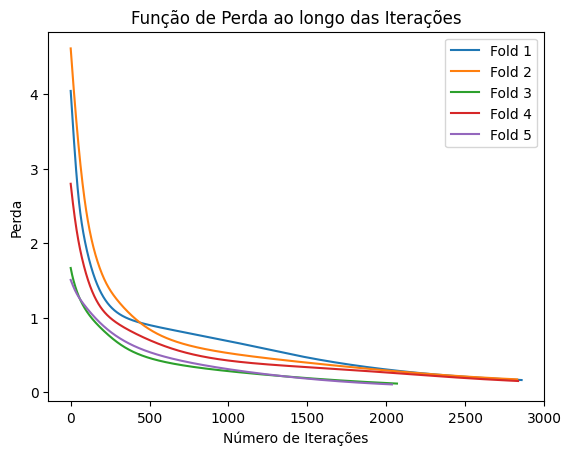

In [ ]:
plt = multilayerPerceptronClassifier(2, 'identity', 'adam', 4000)

plt.title('Função de Perda ao longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.legend()
plt.show()

Como podemos perceber, a nossa suposição inicial foi atendida, pois claramente há uma convergência das 5 funções de perda mostradas acima. Além de uma tendência de estabilização por parte de cada um dos nossos classificadores

#####Mudando a quantidade de neurônios em nossa Hidden Layer

Continuamente, pegarei novamente as características de nosso modelo inicial, mas adicionarei mais neurônios em nossa camada escondida, ou seja, a hidden layer. Portanto, ficaremos com os seguintes parâmetros:

*   1 camada escondida com 5 neurônios
*   Número máximo de iterações igual a 500
*   Identity
*   Solver: adam

De modo análogo ao modelo anterior, teremos ao todo 4 dados de entrada e 3 opções de saída. Logo, teremos algo próximo da imagem abaixo:

![](https://drive.google.com/uc?export=view&id=1tzkZfs9Ic2Yno3o38jrqWPCQq39GnXAQ)

Com isso em mente, o aumento na quantidade de neurônios em nossa Hidden Layer, nos fornece algumas vantagens, tais como:



*   Maior capacidade de aprendizado: Ao aumentar o número de neurônios, o nosso modelo ganha mais capacidade de aprender representações mais complexas. Em termos gerais, isso pode ser útil em problemas mais complexos ou com maior dimensionalidade.
*   Melhor ajuste aos dados de treinamento: Um modelo com mais neurônios tem maior flexibilidade para se ajustar aos dados de treinamento, o que pode resultar em uma redução do viés do modelo e melhor desempenho em termos de ajustes aos dados observados. Porém, isso cria um desvantagem, na qual abordarei mais abaixo.
*   Potencial para melhor desempenho em conjuntos de dados complexos: Em problemas com padrões mais sutis ou intrincados, um modelo com mais neurônios pode ser capaz de capturar esses padrões de maneira mais precisa, levando a um desempenho geral melhor.

Porém, vale deixar claro que o aumento na quantidade de neurônios pode ocasionar em problemas sério para o nosso modelo. Dessa forma, citarei abaixo algumas desvantagens:

*   Possibilidade de overfitting: Como dito anteriormente, temos que um número excessivo de neurônios pode levar ao overfitting, ou seja, o modelo se ajusta muito bem aos dados de treinamento, mas tem dificuldade em generalizar para novos dados. Isso ocorre porque o modelo pode memorizar os dados de treinamento em vez de aprender padrões gerais.
*   Maior complexidade computacional: À medida que o número de neurônios aumenta, o processamento computacional necessário para treinar e fazer previsão com o modelo também aumenta. Isso pode exigir mais recursos computacionais e tempo de processamento.
*   Potencial para problemas de convergência: Modelos com muitos neurônios podem ser mais difíceis de otimizar durante o treinamento. A maior dificuldade encontrada que se origina deste problema é que pode ser necessário ajustar os parâmetros de treinamento, como por exemplo o número máximo de iterações, para que, graficamente falando, as funções de perda consigam nos mostrar uma convergência adequada.


Com tudo isso em mente, podemos concluir que o resultado esperado é um aumento nos scores de nossos classificadores, além de uma melhora nas respectivas funções de perda. Assim, segue abaixo o código e o gráfico da função de perda dos classificadores gerados nessa execução:

Fold  1
Score no conjunto treinamento:  0.8333333333333334
Score no conjunto teste:  1.0


Fold  2
Score no conjunto treinamento:  0.7962962962962963
Score no conjunto teste:  0.8148148148148148


Fold  3
Score no conjunto treinamento:  0.6388888888888888
Score no conjunto teste:  0.0


Fold  4
Score no conjunto treinamento:  0.9259259259259259
Score no conjunto teste:  0.8518518518518519


Fold  5
Score no conjunto treinamento:  0.8703703703703703
Score no conjunto teste:  0.1111111111111111




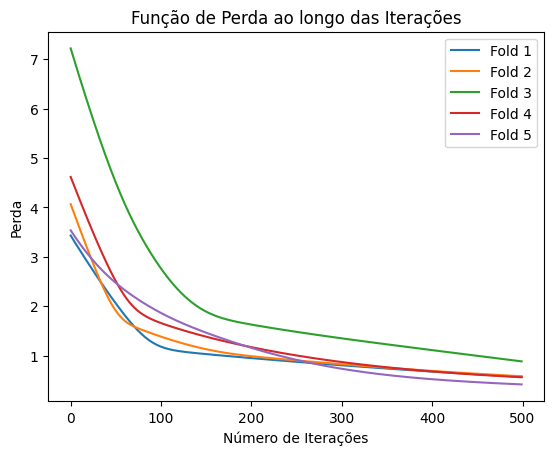

In [ ]:
plt = multilayerPerceptronClassifier(5, 'identity', 'adam', 500)

plt.title('Função de Perda ao longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.legend()
plt.show()

Como podemos perceber, tivemos uma melhora notória de nosso desempenho em relação ao nosso classificador com os parâmetros inicialmente dados. Dessa forma, o aumento na quantidade de neurônios na hidden layer se apresenta como uma boa alternativa para ser aplicada mais a frente, no item 8.

#####Mudando a nossa função de ativação

Por fim, darei início a minha última experiência antes de partir para um modelo "em definitivo", que será utilizado para elaborar o item 8. Por definição, temos que o MLPClassifier aceita 4 tipos diferentes de funções de ativação, são elas:

*   Identity
*   Logistic
*   Tanh
*   Relu

Realizando um enfoque especial nessa última, temos que ela é bastante utilizada por ser capaz de permitir um treinamento mais efetivo e rápido em redes com 3 ou mais camadas escondidas. Tal qual, podemos dizer que ela possui as seguintes vantagens:

*  Eficiência computacional: A função ReLU é computacionalmente eficiente devido à sua simplicidade matemática. Ela é implementada como uma função de ativação elementar, que é rápida de calcular em comparação com funções mais complexas, como a função sigmoide ou tangente hiperbólica.
*   Não possui limites superiores: A função ReLU não possui limites superiores, o que permite que os neurônios tenham saídas arbitrárias positivas (ou de valor igual a zero, o que vai gerar uma das desvantagens abaixo). Isso pode ser benéfico em problemas em que não há restrições rígidas sobre o intervalo de saída.

Como fora dito, a questão da saída ter valor igual a zero pode ocasionar problemas. Dessa forma, a função ReLu também pode apresentar desvantagens, como as seguintes:

*   Ausência de ativação para valores negativos: A função ReLU define a saída como zero para valores negativos, o que pode causar a morte dos neurônios se eles entrarem em um estado em que nunca se ativem. Isso pode resultar em caminhos de informação bloqueados durante o treinamento e afetar negativamente o desempenho do modelo.
*   Não é simétrica: A função ReLU não é simétrica em torno de zero, o que pode causar um viés nos pesos durante o treinamento.

Com isso em mente, partiremos para a implementação de classificadores usando a ReLu, com o objetivo de melhorar o desempenho em comparação aos classificadores que foram feitos usando os parâmetros dados originalmente, já que a ReLu é conhecida por exigir menos iterações, pois apresenta resultados eficazes e rápidos. Dito isso, segue abaixo o nosso código:



Fold  1
Score no conjunto treinamento:  0.18518518518518517
Score no conjunto teste:  1.0


Fold  2
Score no conjunto treinamento:  0.6666666666666666
Score no conjunto teste:  0.6666666666666666


Fold  3
Score no conjunto treinamento:  0.8333333333333334
Score no conjunto teste:  0.0


Fold  4
Score no conjunto treinamento:  0.6296296296296297
Score no conjunto teste:  0.6296296296296297


Fold  5
Score no conjunto treinamento:  0.4166666666666667
Score no conjunto teste:  0.0




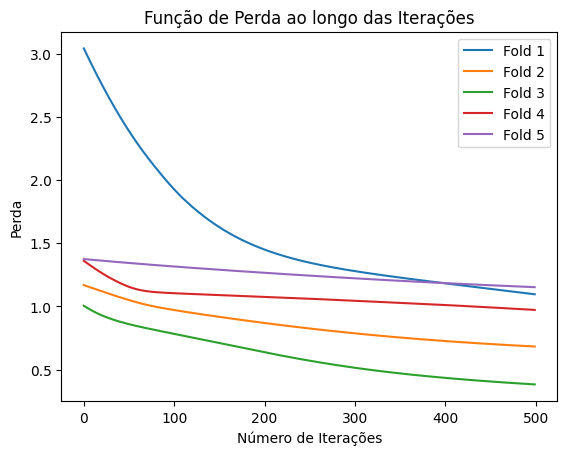

In [ ]:
plt = multilayerPerceptronClassifier(2, 'relu', 'adam', 500)

plt.title('Função de Perda ao longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.legend()
plt.show()

Em alguns de nossos classificadores a função acabou por apresentar resultados "estranhos", como valores extremamente baixos de score nos conjuntos de teste, o que pode ser um indicativo de overfitting.

Ademais, analisando graficamente, temos que em alguns casos a função de perda começou a estabilizar em torno de valores considerados altos, o que não é ideal, pois representa uma grande distância entre o que foi previsto e a realidade.

Logo, apesar de, às vezes, termos um fold com resultados de score bastante favoráveis, temos que, para essa modelagem, o uso da função de ativação ReLu acaba por ser "instável" pois há chances consideráveis de gerar um resultado impreciso e ineficaz. Logo, nossa expectativa inicial não foi atendida.


####8- Após terminar todos os experientos, escolha o modelo gerado que você considera o melhor resultado. Usando os parâmetros deste modelo, faça um novo treinamento usando todos os 90% dos dados.

Primeiramente, temos que a função desenvolvida anteriormente, ou seja, a "multilayerPerceptronClassifier" não era capaz de atender as nossas necessidades, por ter sido desenvolvida visando o uso de K-folds e a manipulação de vários classificadores ao mesmo tempo. Por conta disso, se fez necessário a reescrita dessa função, em uma segunda versão, visando a manipulação de um único classificador e a utilização da íntegra do nosso conjunto de dados sem a separação por K-folds, isto é, aqueles $90\%$ do nosso conjunto de dados que fora separado lá trás neste Colab. Com isso em mente, segue abaixo o código:

In [ ]:
def multilayerPerceptronClassifierTwo(hidden_layer_sizes, activation, solver, max_iter):

  X_train = df_resto.iloc[:, :-1]
  y_train = df_resto.iloc[:, -1]

  warnings.filterwarnings("ignore", category=ConvergenceWarning)

  classificador = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation = activation, solver = solver, max_iter = max_iter)
  classificador.fit(X_train, y_train)

  print("Score no conjunto treinamento: ", classificador.score(X_train, y_train))

  loss_history = classificador.loss_curve_
  plt.plot(loss_history, label = f'Classificador com 90% dos dados')

  return plt, classificador

Aplicando os conhecimentos aprendidos no decorrer das últimas experiências, podemos perceber que os melhores resultados foram obtidos em dois momentos específicos:

*   Aumentando a quantidade de iterações
*   Aumentando a quantidade de neurônios em nossa camada escondida

Com isso em mente, optei por mesclar os dois momentos, resultando em um classificador com as seguintes características:

*   1 camada escondida com 5 neurônios
*   Número máximo de iterações igual a 4000
*   Identity
*   Solver: adam

Assim sendo, só nos resta realizar o treinamento de fato com o "novo" conjunto de dados e explicar os resultados obtidos no decorrer do item de número 9. Dessa forma, segue abaixo o código e o plot da função de perda do nosso recém-criado classificador:



Score no conjunto treinamento:  0.9703703703703703


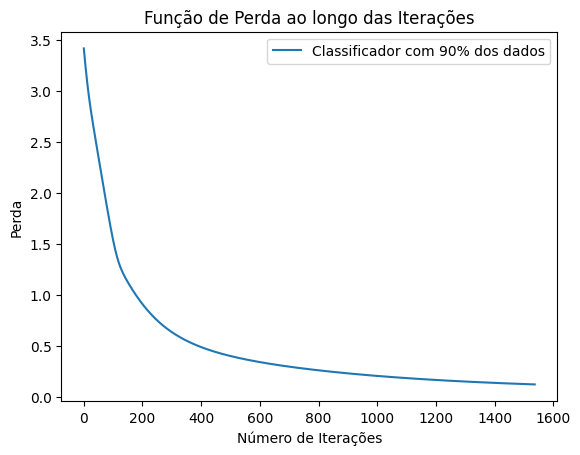

In [ ]:
plt, classificador = multilayerPerceptronClassifierTwo(5, 'identity', 'adam', 4000)

plt.title('Função de Perda ao longo das Iterações')
plt.xlabel('Número de Iterações')
plt.ylabel('Perda')
plt.legend()
plt.show()

####9- Avalie o modelo gerado no item 8 usando as 15 instâncias que não foram usadas.

De modo análogo ao que foi feito no início desse Colab para o conjunto de 90% de nossa database, para pegar nosso $X_{test}$ basta pegar todas as colunas, menos a última. E, por consequência, nosso $Y_{test}$ será justamente a nossa última coluna.

Feito isso, rodarei o método score para descobrir a porcentagem de acerto do modelo criado no item 8 e, logo depois, farei uma brevíssima análise. Segue o código abaixo:

In [ ]:
X_test = df_amostra.iloc[:, :-1]
y_test = df_amostra.iloc[:, -1]

print("Porcentagem de acerto do modelo criado no item 8:\t" + str(classificador.score(X_test, y_test) * 100) + "%")

Porcentagem de acerto do modelo criado no item 8:	100.0%


Como podemos perceber, o modelo criado foi capaz de atender as expectativas criadas no decorrer deste Colab, apresentando uma porcentagem de acerto bastante satisfatória, apesar de termos realizado um teste com um conjunto de testes bastante pequeno. Tal afirmações podem ser comprovados ao percebemos que a acurácia em nosso conjunto de teste foi de 100% e, mesmo se executarmos diversas vezes, consigamos sempre (ou quase isso) valores superiores a 93%. Não só isso, ao analisar individualmente nosso gráfico de perda, temos que ele convergiu para um valor muito próximo de 0 e, não só isso, utilizando menos da metade da iterações inicialmente previstas. Afinal, de um máximo de 4000 iterações, nosso modelo precisou de menos de 2000 iterações para chegar em seu ponto mínimo. Nesses mesmos moldes, esse modelo é útil não só usando esse tamanho de dataset específico, mas o que eu quero dizer isso? Bem, ao utilizarmos mais neurônios em nossa hidden layer e um valor alto de iterações, esse modelo conseguiria atender satisfatoriamente a um mesmo dataset Iris, porém apresentando uma maior quantidade de instâncias.

###Agradecimentos

Gostaria de utilizar esse espaço para ressaltar meus agradecimentos aos seguintes professores:

*   Hugo Tremonte de Carvalho
*   João Antônio Recio da Paixão
*   João Carlos Pereira da Silva

Que puderam me fornecer outra perspectiva da Computação, me garantindo um grande aprendizado desenvolvendo projetos na área de aprendizado de máquina.

Agora, falando em colegas de turma, gostaria de agradecer em especial a:
*   David Rodrigues Albuquerque

Por me auxiliar trocando ideias e explicando alguns conceitos durante a elaboração desse Colab.

Por fim, espero ter conseguido articular bem os conceitos, pois os mesmos não são fáceis. Dessa forma, venho por meio deste terminar com um breve trecho de um poeta galês:

#***“Não adentre a boa noite apenas com ternura / A Velhice queima e clama ao cair do dia / Fúria, Fúria, contra a luz que desventura” - Thomas, Dylan***

#Referências Bibliográficas

https://drigols.medium.com/introdu%C3%A7%C3%A3o-a-valida%C3%A7%C3%A3o-cruzada-k-fold-2a6bced32a90

https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

http://alexlenail.me/NN-SVG/index.html

https://www.youtube.com/watch?v=fEukSrpDPH0

https://www.youtube.com/watch?v=0eQ6-6A5W6I

https://www.youtube.com/watch?v=ZgYfCDxcQSE

https://www.youtube.com/watch?v=_XJTjJ0ZFFE

https://www.youtube.com/watch?v=Odm-cm-nxVo

https://www.youtube.com/watch?v=cO59qwb3Haw

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


